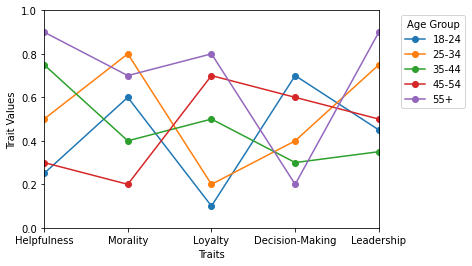

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample data frame with age group and several traits as percentages
df = pd.DataFrame({
    'Age Group': ['18-24', '25-34', '35-44', '45-54', '55+'],
    'Helpfulness': [25, 50, 75, 30, 90],
    'Morality': [60, 80, 40, 20, 70],
    'Loyalty': [10, 20, 50, 70, 80],
    'Decision-Making': [70, 40, 30, 60, 20],
    'Leadership': [45, 75, 35, 50, 90]
})

# Convert percentage values to fractions
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x / 100)

# Set up the plot
fig, ax = plt.subplots()

# Iterate through each age group and plot a line for each trait
for age_group in df['Age Group']:
    ax.plot(df.columns[1:], df.loc[df['Age Group']==age_group, 'Helpfulness':].values[0], marker='o', label=age_group)

# Set the x-axis label and limits
ax.set_xlabel('Traits')
ax.set_xlim([df.columns[1], df.columns[-1]])

# Set the y-axis label and limits
ax.set_ylabel('Trait Values')
ax.set_ylim([0, 1])

# Add a legend
legend = ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


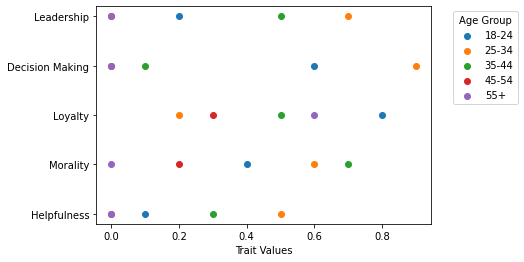

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data with different array sizes
age_groups = ['18-24', '25-34', '35-44', '45-54', '55+']
helpfulness = np.array([0.1, 0.5, 0.3])
morality = np.array([0.4, 0.6, 0.7, 0.2])
loyalty = np.array([0.8, 0.2, 0.5, 0.3, 0.6])
decision_making = np.array([0.6, 0.9, 0.1])
leadership = np.array([0.2, 0.7, 0.5])

# Pad the shorter arrays with zeros
max_length = max(len(helpfulness), len(morality), len(loyalty), len(decision_making), len(leadership))
helpfulness = np.pad(helpfulness, (0, max_length - len(helpfulness)))
morality = np.pad(morality, (0, max_length - len(morality)))
loyalty = np.pad(loyalty, (0, max_length - len(loyalty)))
decision_making = np.pad(decision_making, (0, max_length - len(decision_making)))
leadership = np.pad(leadership, (0, max_length - len(leadership)))

# Create the scatter plot
fig, ax = plt.subplots()

for i, age_group in enumerate(age_groups):
    ax.scatter([helpfulness[i], morality[i], loyalty[i], decision_making[i], leadership[i]], [1, 2, 3, 4, 5], label=age_group)

ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(['Helpfulness', 'Morality', 'Loyalty', 'Decision Making', 'Leadership'])
ax.set_xlabel('Trait Values')
ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


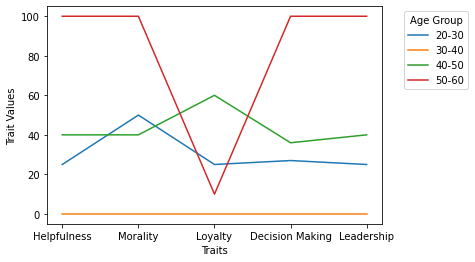

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
age_groups = ['20-30', '30-40', '40-50', '50-60']
helpfulness = np.array([25, 0, 40, 100, 30])
morality = np.array([50, 0, 40, 100, 30])
loyalty = np.array([25, 0, 60, 10, 30])
decision_making = np.array([27, 0, 36, 100, 10])
leadership = np.array([25, 0, 40, 100, 30])

# Create the line plot
fig, ax = plt.subplots()

for i, age_group in enumerate(age_groups):
    ax.plot([helpfulness[i], morality[i], loyalty[i], decision_making[i], leadership[i]], label=age_group)

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['Helpfulness', 'Morality', 'Loyalty', 'Decision Making', 'Leadership'])
ax.set_xlabel('Traits')
ax.set_ylabel('Trait Values')
ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


0
1
2
3
Age Groups: ['20-30', '30-40', '40-50', '50-60']
Helpfulness: [58.33333333 50.          0.          0.        ]
Morality: [41.66666667  0.          0.          0.        ]
Loyalty: [33.33333333  0.          0.          0.        ]
Decision Making: [58.33333333 50.          0.          0.        ]
Leadership: [45.83333333 25.          0.          0.        ]
<class 'numpy.ndarray'>


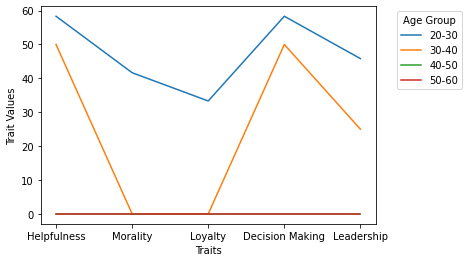

In [4]:
import sqlite3
import numpy as np

# Connect to the database
conn = sqlite3.connect('D-Day_database.db')
c = conn.cursor()

# Define age groups and traits
age_groups = ['20-30', '30-40', '40-50', '50-60']
traits = ['Help', 'Morality', 'Loyal', 'Decision', 'Leader']

# Initialize numpy arrays for mean values
helpfulness = np.zeros(len(age_groups))
morality = np.zeros(len(age_groups))
loyalty = np.zeros(len(age_groups))
decision_making = np.zeros(len(age_groups))
leadership = np.zeros(len(age_groups))

# Retrieve mean values for each age group and trait
for i, age_group in enumerate(age_groups):
    print(i)
    for j, trait in enumerate(traits):
        query = f"SELECT AVG({trait}) FROM user_details WHERE Age BETWEEN {age_group.split('-')[0]} AND {age_group.split('-')[1]}"
        c.execute(query)
        mean_value = c.fetchone()[0]
        if mean_value is not None:
            if trait == 'Help':
                helpfulness[i] = mean_value
            elif trait == 'Morality':
                morality[i] = mean_value
            elif trait == 'Loyal':
                loyalty[i] = mean_value
            elif trait == 'Decision':
                decision_making[i] = mean_value
            elif trait == 'Leader':
                leadership[i] = mean_value

# Print mean values for each age group and trait
print(f"Age Groups: {age_groups}")
print(f"Helpfulness: {helpfulness}")
print(f"Morality: {morality}")
print(f"Loyalty: {loyalty}")
print(f"Decision Making: {decision_making}")
print(f"Leadership: {leadership}")
print(type(leadership))

# Close the database connection
conn.close()

import matplotlib.pyplot as plt
import numpy as np

# Create the line plot
fig, ax = plt.subplots()

for i, age_group in enumerate(age_groups):
    ax.plot([helpfulness[i], morality[i], loyalty[i], decision_making[i], leadership[i]], label=age_group)

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['Helpfulness', 'Morality', 'Loyalty', 'Decision Making', 'Leadership'])
ax.set_xlabel('Traits')
ax.set_ylabel('Trait Values')
ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Gender Groups: ['Male', 'Female']
Helpfulness: [56.25       58.33333333]
Morality: [25. 50.]
Loyalty: [25.         33.33333333]
Decision Making: [75.         33.33333333]
Leadership: [56.25 25.  ]


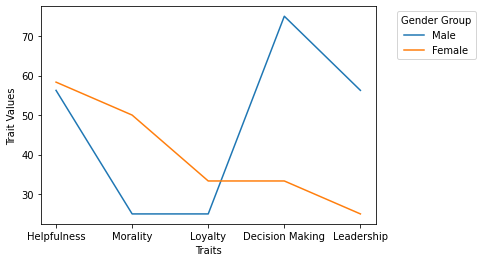

In [5]:
import sqlite3
import numpy as np

# Connect to the database
conn = sqlite3.connect('D-Day_database.db')
c = conn.cursor()

# Define gender groups and traits
gender_groups = ['Male', 'Female']
traits = ['Help', 'Morality', 'Loyal', 'Decision', 'Leader']

# Initialize numpy arrays for mean values
helpfulness = np.zeros(len(gender_groups))
morality = np.zeros(len(gender_groups))
loyalty = np.zeros(len(gender_groups))
decision_making = np.zeros(len(gender_groups))
leadership = np.zeros(len(gender_groups))

# Retrieve mean values for each gender group and trait
for i, gender_group in enumerate(gender_groups):
    for j, trait in enumerate(traits):
        query = f"SELECT AVG({trait}) FROM user_details WHERE Gender='{gender_group}'"
        c.execute(query)
        mean_value = c.fetchone()[0]
        if mean_value is not None:
            if trait == 'Help':
                helpfulness[i] = mean_value
            elif trait == 'Morality':
                morality[i] = mean_value
            elif trait == 'Loyal':
                loyalty[i] = mean_value
            elif trait == 'Decision':
                decision_making[i] = mean_value
            elif trait == 'Leader':
                leadership[i] = mean_value

# Print mean values for each gender group and trait
print(f"Gender Groups: {gender_groups}")
print(f"Helpfulness: {helpfulness}")
print(f"Morality: {morality}")
print(f"Loyalty: {loyalty}")
print(f"Decision Making: {decision_making}")
print(f"Leadership: {leadership}")

# Close the database connection
conn.close()


import matplotlib.pyplot as plt
import numpy as np

# Sample data
#age_groups = ['20-30', '30-40', '40-50', '50-60']
#helpfulness = np.array([25, 0, 40, 100, 30])
#morality = np.array([50, 0, 40, 100, 30])
#loyalty = np.array([25, 0, 60, 10, 30])
#decision_making = np.array([27, 0, 36, 100, 10])
#leadership = np.array([25, 0, 40, 100, 30])

# Create the line plot
fig, ax = plt.subplots()

for i, age_group in enumerate(gender_groups):
    ax.plot([helpfulness[i], morality[i], loyalty[i], decision_making[i], leadership[i]], label=age_group)

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['Helpfulness', 'Morality', 'Loyalty', 'Decision Making', 'Leadership'])
ax.set_xlabel('Traits')
ax.set_ylabel('Trait Values')
ax.legend(title='Gender Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()